# Project: WeRateDogs Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gather">Data Gathering</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#store">Storing Data</a></li>
<li><a href="#avd">Analyzing and Visualizing Data</a></li>
</ul>

<a id='intro'></a>
## Introduction
This project involves wrangling (and analyzing and visualizing) the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent"](http://knowyourmeme.com/memes/theyre-good-dogs-brent).

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning will be done to achieve worthy analyses and visualizations.

The sections in this project are as follows:
1. Data Gathering
2. Assessing data
3. Cleaning data
4. Storing data
5. Analyzing and visualizing data

In [3]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os
import requests
import tweepy
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='gather'></a>
## Data Gathering
In this section, we'll gather all three pieces of data for this project. These data are:
1. The WeRateDogs Twitter archive (twitter_archive_enhanced.csv)
2. The tweet image predictions (image_predictions.tsv)
3. Additional data from the Twitter API (tweet_json.txt)

#### The WeRateDogs Twitter archive (`twitter_archived_advanced.csv`)

In [4]:
# read the 'twitter_archived_advanced.csv' file into a pandas dataframe and load the first few lines
tweets_archive = pd.read_csv('twitter-archive-enhanced.csv')
tweets_archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### The tweet image predictions (`image_predictions.tsv`)
This file will be downloaded programmatically using the [Requests](https://pypi.org/project/requests/) library. 

In [ ]:
# store the link to the file in a variable called 'url'
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

In [ ]:
# download the file programmatically
response = requests.get(url)

In [ ]:
# write the downloaded content to a file path labelled 'image_predictions.tsv'
with open (os.path.join('image_predictions.tsv'), mode='wb') as file:
    file.write(response.content)

In [5]:
# read the 'image_predictions.tsv' file into a dataframe and load the first few lines
image_predictions = pd.read_csv('image_predictions.tsv', sep='\t')
image_predictions.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### Additional data from the Twitter API (`tweet_json.txt`)
We will gather each tweet's retweet count and favorite (like) count. Using the tweet IDs in the WeRateDogs Twitter archive, we will query the Twitter API for each tweet's JSON data using Python's [Tweepy](http://www.tweepy.org/) library and store each tweet's entire set of JSON data in a file called tweet_json.txt file with each tweet's JSON data on its own line. We will then read this file, line by line, to create a pandas DataFrame that will be assessed and cleaned.

In [ ]:
# authenticate access to Twitter's API
consumer_key = 'YOUR CONSUMER KEY'
consumer_secret = 'YOUR CONSUMER SECRET'
access_token = 'YOUR ACCESS TOKEN'
access_secret = 'YOUR ACCESS SECRET'

auth = tweepy.OAuth1UserHandler(consumer_key, consumer_secret, access_token, access_secret)

# create an API object that you can use to gather Twitter data.
api = tweepy.API(auth, wait_on_rate_limit=True)

In [ ]:
# create a list of the 'tweet_ids' in 'twitter_archive_advanced.csv' file
tweet_id_list = list(tweets_archive['tweet_id'])

In [ ]:
# create a json list where all the tweet's JSON objects would be appended
json_list = []

# gather data by querying the twitter API, this can take 20-30 mins 
for tweet_id in tweet_id_list:
    try:
        count = tweet_id_list.index(tweet_id) + 1
        print(count) #this prints from 1 - 2356, giving an idea of how many tweets have been queried and how many is left
        tweet = api.get_status(tweet_id, tweet_mode='extended')
        json_list.append(str(json.dumps(tweet._json)) + '\n') #append each tweet's JSON object on its own line
        
            
    except Exception as e:
        print(str(tweet_id) + ': ' + str(e)) #prints an error message for tweet IDs corresponding to tweets that may have been deleted

# store each tweet's entire set of JSON data in a file called tweet_json.txt file with each tweet's JSON data on its own line
with open ('tweet_json.txt', mode='w', encoding='utf-8') as file:
            file.writelines(json_list)

In [6]:
# create a list where the dictionaries for each JSON object would be appended
df_list = []

# read the 'tweet_json.txt' file line by line into a pandas dataframe with 'tweet_id', 'favorite_count' & 'retweet_count'
with open ('tweet_json.txt', encoding='utf-8') as infile:
    for line in infile:
        data = json.loads(line)
        tweet_id = data['id']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        df_list.append({'tweet_id':tweet_id,
                       'favorite_count':favorite_count,
                       'retweet_count':retweet_count})

        
fav_n_retweet = pd.DataFrame(df_list, columns=['tweet_id','favorite_count','retweet_count'])

In [7]:
# load the first few lines of the dataframe
fav_n_retweet.head(2)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33701,6978
1,892177421306343426,29231,5280


The Data Gathering process has been successfully completed. We now have all the data we need for our analyses and visualizations but we need to assess and clean these data in order to achieve worthy analyses and visualizations.

Let's move to the next process, **Assessing Data**

_____

<a id='assess'></a>
## Assessing Data
Now that we have gathered all three pieces of data, we will assess them visually and programmatically for quality and tidiness issues in this section. 

In [7]:
# display the Twitter archive for visual assessment
tweets_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


The following issues were detected:
- Some instances are not original tweets 
- Nulls represented as "None" in name, doggo, floofer, pupper and puppo columns 
- Inaccurate names in the name column such as 'a', 'an', 'None', etc 
- One variable in four columns (dog_stage) 

In [8]:
# display the image predictions file for visual assessment
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


The following issues were detected:
- Inaccurate image predictions such as paper_towel, orange, bagel, etc. 
- Underscore (_) used in place of space in predictions 
- Ceratin predictions begin with capital letter while some do not 
- Multiple predictions per tweet (dog_breed)

In [9]:
# display the the favorite and retweet file for visual assessment
fav_n_retweet

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33701,6978
1,892177421306343426,29231,5280
2,891815181378084864,21973,3466
3,891689557279858688,36777,7190
4,891327558926688256,35165,7723
...,...,...,...
2322,666049248165822465,88,36
2323,666044226329800704,245,115
2324,666033412701032449,100,36
2325,666029285002620928,112,39


The following issues were detected:
- favorite_count and retweet_count should be part of tweets_archive 

**Let's assess programmatically**

In [10]:
# look at the columns with missing values and incorrect datatypes in the twitter archive file
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

The following issues were detected:
- Incorrect datatypes 

In [11]:
# look at the columns with missing values and incorrect datatypes in the image prediction file
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


The following issue was detected:
- Incorrect datatype 

In [12]:
# look at the columns with missing values and incorrect datatypes in the favorite and retweet file
fav_n_retweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2327 non-null   int64
 1   favorite_count  2327 non-null   int64
 2   retweet_count   2327 non-null   int64
dtypes: int64(3)
memory usage: 54.7 KB


The following issue was detected:
- Incorrect datatype 

In [8]:
# summary statistics of tweets_archive
tweets_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


Certain ratings have a denominator not equal to 10. Let's investigate that further

In [9]:
#get the tweets with a rating denominator not equal to 10
tweets_archive[tweets_archive['rating_denominator'] != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


From assessing the above sliced out dataframe, certain ratings are incorrectly extracted. Looking at tweet ID 810984652412424192 as an example, the text says "Meet Sam. She smiles 24/7 & secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx" and the extracted rating numerator and denominator were 24 and 7. This is not correct. There shouldn't be any rating in this tweet.

Assessing the `tweets_archive` also revealed that ratings with decimal points were not correctly extracted, for example

In [10]:
tweets_archive[tweets_archive['tweet_id'] == 786709082849828864]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None


The text of the above tweet says "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS" and the extracted numerator is 75. This is not correct. The numerator is 9.75

In [14]:
#summary statistics of image_predictions
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


No issue detected

In [15]:
#summary statistics of fav_n_retweet
fav_n_retweet.describe()

,tweet_id,favorite_count,retweet_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,7027.827675,2460.667383
std,6.820795e+16,10919.576580,4167.342069
min,6.660209e+17,0.000000,1.000000
25%,6.781394e+17,1221.000000,492.500000
50%,7.178418e+17,3041.000000,1147.000000
75%,7.986547e+17,8568.500000,2846.500000
max,8.924206e+17,144286.000000,70408.000000


No issue detected

In [16]:
# let's look at the unique values in the name column of the tweet_archive
tweets_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

All of the wrong names begin with a lower case letter except for 'None'

In [17]:
# let's look at the unique values in the doggo column
tweets_archive['doggo'].unique()

array(['None', 'doggo'], dtype=object)

No issue detected

In [18]:
# let's look at the unique values in the floofer column
tweets_archive['floofer'].unique()

array(['None', 'floofer'], dtype=object)

No issue detected

In [19]:
# let's look at the unique values in the pupper column
tweets_archive['pupper'].unique()

array(['None', 'pupper'], dtype=object)

No issue detected

In [20]:
# let's look at the unique values in the puppo column
tweets_archive['puppo'].unique()

array(['None', 'puppo'], dtype=object)

No issue detected

In [11]:
# check the number of each arrangement for dog stages
tweets_archive.groupby(["doggo", "floofer", "pupper", "puppo"]).size().reset_index().rename(columns={0: "count"})

,doggo,floofer,pupper,puppo,count
0,None,None,None,None,1976
1,None,None,None,puppo,29
2,None,None,pupper,None,245
3,None,floofer,None,None,9
4,doggo,None,None,None,83
5,doggo,None,None,puppo,1
6,doggo,None,pupper,None,12
7,doggo,floofer,None,None,1


There are 14 rows that have multiple dog stages:
- 1 row has both doggo and puppo
- 12 rows has both doggo and pupper
- 1 row has both doggo and floofer

### The following issues were detected from assessing all three data:
#### Quality
- Some instances are not original tweets
- Incorrect datatypes
- Nulls represented as "None" in name, doggo, floofer, pupper and puppo columns
- Multiple dog stages for certain tweets
- Inaccurate names in the name column such as 'a', 'an', 'None', etc, and most of these wrong names begin with a lower case letter
- Incorrectly extracted rating_numerator and rating_denominator
- Multiple image predictions per tweet
- Inaccurate image predictions such as paper_towel, orange, bagel, etc.
- The method of representing the predictions is not valid (ceratin predictions begin with capital letter while some do not & underscore (_) used in place of space)

#### Tidiness
- One variable (dog_stage) in four columns in `tweets_archive`
- favorite_count and retweet_count should be part of `tweets_archive`

Let's go ahead to clean the issues detected.
____

<a id='clean'></a>
## Cleaning Data
In this section, we will clean the issues documented while assessing. 

In [12]:
# Make copies of original pieces of data
tweets_archive_copy = tweets_archive.copy()
image_pred_copy = image_predictions.copy()
fav_n_retweet_copy = fav_n_retweet.copy()

### Tidiness

#### One variable (dog_stage) in four columns in `tweets_archive` _(Tidiness Isssue)_ & Multiple dog stages for certain tweets _(Quality Issue)_

##### Define

In this step, we will be cleaning 2 issues:
1. One variable (dog_stage) in four columns in `tweets_archive` _(Tidiness Isssue)_: Melt the doggo, floofer, pupper and puppo columns into a single dog_stage column.
2. Multiple dog stages for certain tweets _(Quality Issue)_: Make those tweets have the same dog_stage (i.e. the accurate one), then drop duplicates.

##### Code

In [13]:
# get the tweet_id, doggo, floofer, pupper and puppo columns into a separate dataframe so as it to make melting easier
dog_stages_df = tweets_archive_copy[['tweet_id','doggo','floofer','pupper','puppo']]

In [14]:
# melt the dog_stages_df
dog_stages_df = dog_stages_df.melt(id_vars='tweet_id', var_name = 'all_dog_stage', value_name='dog_stage')

In [15]:
#read the first few lines of the melted dataframe
dog_stages_df.head()

,tweet_id,all_dog_stage,dog_stage
0,892420643555336193,doggo,None
1,892177421306343426,doggo,None
2,891815181378084864,doggo,None
3,891689557279858688,doggo,None
4,891327558926688256,doggo,None


In [16]:
# drop all_dog_stage column
dog_stages_df = dog_stages_df.drop('all_dog_stage', axis=1)

In [17]:
# remove all the 'None' values from dog_stage column
dog_stages_df = dog_stages_df[dog_stages_df['dog_stage'] != 'None']

In [18]:
#read the first few lines of the improved melted dataframe
dog_stages_df.head()

,tweet_id,dog_stage
9,890240255349198849,doggo
43,884162670584377345,doggo
99,872967104147763200,doggo
108,871515927908634625,doggo
110,871102520638267392,doggo


Each tweet ID now has a dog stage attached to it.

**Before we merge the `dog_stages_df` with `tweets_archive` let's clean the multiple dog stages for certain tweets.**

In [19]:
#check for duplicated tweet IDs
dog_stages_df[dog_stages_df['tweet_id'].duplicated()]

,tweet_id,dog_stage
2556,854010172552949760,floofer
5172,817777686764523521,pupper
5243,808106460588765185,pupper
5277,802265048156610565,pupper
5287,801115127852503040,pupper
5417,785639753186217984,pupper
5445,781308096455073793,pupper
5490,775898661951791106,pupper
5534,770093767776997377,pupper
5601,759793422261743616,pupper


_Now we have the 14 tweet IDs in the `tweets_archive` table that have multiple dog stages_

From investigation of each of the duplicated tweet ID's text, and image, and also in conjuction with the Dogtionary via the [#WeRateDogs book on Amazon](https://www.amazon.com/WeRateDogs-Most-Hilarious-Adorable-Youve/dp/1510717145), the following conclusions were reached, 6 tweet IDs are tweets about a single dog while the other 8 tweet IDs are tweets about two dogs:

- 854010172552949760 is a floofer
- 817777686764523521 is a pupper
- 808106460588765185 contains two dogs 
- 802265048156610565 contains two dogs 
- 801115127852503040 is a pupper
- 785639753186217984 is a doggo
- 781308096455073793 contains two dogs 
- 775898661951791106 contains two dogs 
- 770093767776997377 contains two dogs 
- 759793422261743616 contains two dogs; Maggie and Lila. Maggie is the doggo, Lila is the pupper 
- 751583847268179968 is a doggo
- 741067306818797568 contains two dogs 
- 733109485275860992 contains two dogs 
- 855851453814013952 is a puppo

_**NOTE:** Another quality issue; one name for the two dogs in tweet_id 759793422261743616_

**Let's remove the erroneous dog_stages from the table i.e. tweet IDs that are tweets about one dog with two different dog stages attributed to that ID. 
First, we make those IDs have the same dog_stage _(the accurate one)_ , then we remove duplicates.**

In [20]:
#create a dictionary for all the tweet IDs of erroneous dog stages, making the values the accurate dog stage
stage_dict = {854010172552949760:'floofer',
             817777686764523521:'pupper',
             801115127852503040:'pupper',
             785639753186217984:'doggo',
             751583847268179968:'doggo',
             855851453814013952:'puppo'}


#define a function to change the wrong dog stage to the accurate one 
def correct_stage(dog_stages_df):
    if dog_stages_df['tweet_id'] in stage_dict.keys():
        stage = stage_dict[dog_stages_df['tweet_id']]
        return stage
    else:
        return dog_stages_df['dog_stage']

In [21]:
#apply the defined function to the dog_stage column
dog_stages_df['dog_stage'] = dog_stages_df.apply(correct_stage, axis=1)

In [22]:
#drop duplicates
dog_stages_df.drop_duplicates(inplace=True)

In [23]:
#let's take a look at the sum of tweet IDs that are duplicated now to check if the erroneous multiple dog stages are no more
dog_stages_df['tweet_id'].duplicated().sum()

8

Now, we are left with the 8 tweet IDs that are actually for two dogs.

***Let's continue with the tidiness cleaning for `tweets_archive`***

In [24]:
# merge the separated table back with tweets_archive table
tweets_archive_copy = pd.merge(tweets_archive_copy, dog_stages_df, on='tweet_id', how='left')

In [25]:
# drop doggo, floofer, pupper and puppo columns
tweets_archive_copy = tweets_archive_copy.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1)

Before we go ahead to test let's correct the name of the pupper with tweet_id 759793422261743616 from Maggie to Lila. 

In [27]:
tweets_archive_copy.loc[895, 'name'] = 'Lila'

In [28]:
#check if it has been corrected
tweets_archive_copy[tweets_archive_copy['tweet_id'] == 759793422261743616]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
894,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Maggie,doggo
895,759793422261743616,NaN,NaN,2016-07-31 16:50:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Maggie &amp; Lila. Maggie is the doggo, L...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/759793422...,12,10,Lila,pupper


It has been corrected.

##### Test

In [29]:
tweets_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2364 entries, 0 to 2363
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2364 non-null   int64  
 1   in_reply_to_status_id       79 non-null     float64
 2   in_reply_to_user_id         79 non-null     float64
 3   timestamp                   2364 non-null   object 
 4   source                      2364 non-null   object 
 5   text                        2364 non-null   object 
 6   retweeted_status_id         183 non-null    float64
 7   retweeted_status_user_id    183 non-null    float64
 8   retweeted_status_timestamp  183 non-null    object 
 9   expanded_urls               2305 non-null   object 
 10  rating_numerator            2364 non-null   int64  
 11  rating_denominator          2364 non-null   int64  
 12  name                        2364 non-null   object 
 13  dog_stage                   388 n

The variable in the four columns; doggo, puppo, floofer and pupper has now been melted to the dog_stage column.

#### favorite_count and retweet_count should be part of tweets_archive

##### Define
Merge `tweets_archive` and `fav_n_retweet`

##### Code

In [30]:
tweets_archive_copy = pd.merge(tweets_archive_copy, fav_n_retweet_copy, on='tweet_id', how='left')

##### Test

In [31]:
tweets_archive_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,33701.0,6978.0
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,29231.0,5280.0
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,21973.0,3466.0
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,36777.0,7190.0
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,35165.0,7723.0


favorite_count and retweet_count are now part of tweets_archive

### Quality

#### Some instances are not original tweets

##### Define

Remove rows that do not have their instance for retweeted_status_id or in_reply_to_status_id as empty in `tweets_archive`

##### Code

In [32]:
#remove retweets
tweets_archive_copy = tweets_archive_copy[tweets_archive_copy['retweeted_status_id'].isnull()]

In [33]:
#remove replies
tweets_archive_copy = tweets_archive_copy[tweets_archive_copy['in_reply_to_status_id'].isnull()]

In [34]:
# drop the columns that give infomation about retweets and replies, they're no longer needed
tweets_archive_copy = tweets_archive_copy.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp',
                                               'in_reply_to_status_id', 'in_reply_to_user_id'],
                                              axis=1)

##### Test

In [35]:
tweets_archive_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,33701.0,6978.0
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,29231.0,5280.0


Now, we are left with only original tweets.

#### Incorrectly extracted rating_numerator and rating_denominator

##### Define
Extract the ratings from the tweet's text using regex that extracts decimal numerators and then correct the incorrectly extracted ratings.Afterwards, split ratings to numerator and denominator 

##### Code

In [36]:
#extract ratings using regex that extracts decimal numerators
tweets_archive_copy['ratings'] = tweets_archive_copy['text'].str.extract('((?:\d+\.)?\d+/\d+)', expand=True)

In [37]:
tweets_archive_copy.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,ratings
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,33701.0,6978.0,13/10
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,29231.0,5280.0,13/10
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,21973.0,3466.0,12/10
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,36777.0,7190.0,13/10
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,35165.0,7723.0,12/10


Ratings column has been added to `tweets_archive`

Now that we are left with only original tweets, the following tweet IDs have their rating denominator not equal to 10. After investigating their texts, the following conclusions were made:

- 820690176645140481: correct rating extraction
- 810984652412424192: incorrect rating extraction (no rating in the text)
- 758467244762497024: correct rating extraction
- 740373189193256964: incorrect rating extraction (14/10 is the correct rating)
- 731156023742988288: correct rating extraction
- 722974582966214656: incorrect rating extraction (13/10 is the correct rating)
- 716439118184652801: incorrect rating extraction (11/10 is the correct rating)
- 713900603437621249: correct rating extraction
- 710658690886586372: correct rating extraction
- 709198395643068416: correct rating extraction
- 704054845121142784: correct rating extraction
- 697463031882764288: correct rating extraction
- 684222868335505415: correct rating extraction
- 682962037429899265: incorrect rating extraction (10/10 is the correct rating)
- 677716515794329600: correct rating extraction
- 675853064436391936: correct rating extraction
- 666287406224695296: incorrect rating extraction (9/10 is the correct rating)

Let's correct the incorrectly extracted ratings

In [38]:
#create a dictionary for all the tweet IDs with incorrect ratings
ratings_dict = {810984652412424192:' ',
             740373189193256964:'14/10',
             722974582966214656:'13/10',
             716439118184652801:'11/10',
             682962037429899265:'10/10',
             666287406224695296:'9/10'}


#define a function to correct the inaccurate ratings
def correct_ratings(tweets_archive_copy):
    if tweets_archive_copy['tweet_id'] in ratings_dict.keys():
        rating = ratings_dict[tweets_archive_copy['tweet_id']]
        return rating
    else:
        return tweets_archive_copy['ratings']

In [39]:
#apply the defined function to the ratings column
tweets_archive_copy['ratings'] = tweets_archive_copy.apply(correct_stage, axis=1)

In [40]:
#split the ratings column to rating_numerator and rating_denominator
tweets_archive_copy['rating_numerator'] = tweets_archive_copy['ratings'].str.split('/')[0]
tweets_archive_copy['rating_denominator'] = tweets_archive_copy['ratings'].str.split('/')[1]

In [41]:
#drop ratings column
tweets_archive_copy = tweets_archive_copy.drop('ratings', axis=1)

##### Test

In [42]:
#rating_numerator and rating_denominator for tweet_id '810984652412424192' should be empty
tweets_archive_copy[tweets_archive_copy['tweet_id'] == 810984652412424192]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count
516,810984652412424192,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",NaN,NaN,Sam,NaN,5035.0,1328.0


They are empty.

#### Incorrect datatypes

##### Define
Change the incorrect datatypes to the correct datatype

In [43]:
#change id columns to string datatype
tweets_archive_copy['tweet_id'] = tweets_archive_copy['tweet_id'].astype(str)
image_pred_copy['tweet_id'] = image_pred_copy['tweet_id'].astype(str)

#change ratings column to float datatype
tweets_archive_copy['rating_numerator'] = tweets_archive_copy['rating_numerator'].astype(float)
tweets_archive_copy['rating_denominator'] = tweets_archive_copy['rating_denominator'].astype(float)

#change img_num column to category datatype
image_pred_copy['img_num'] = image_pred_copy['img_num'].astype('category')

#changetimestamp column to datetime datatype
tweets_archive_copy['timestamp'] = pd.to_datetime(tweets_archive_copy['timestamp'])

##### Test

In [44]:
#check the datatype of the columns in tweets_archive table
tweets_archive_copy.dtypes

tweet_id                           object
timestamp             datetime64[ns, UTC]
source                             object
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                float64
name                               object
dog_stage                          object
favorite_count                    float64
retweet_count                     float64
dtype: object

Incorrect datatypes have been corrected

In [45]:
#check the datatype of the columns in image_prediction table
image_pred_copy.dtypes

tweet_id      object
jpg_url       object
img_num     category
p1            object
p1_conf      float64
p1_dog          bool
p2            object
p2_conf      float64
p2_dog          bool
p3            object
p3_conf      float64
p3_dog          bool
dtype: object

Incorrect datatypes have been corrected

#### Nulls represented as 'None'

##### Define
Replace all 'None' with `np.nan`

##### Code

In [46]:
tweets_archive_copy = tweets_archive_copy.replace('None',np.nan)

##### Test

In [47]:
#check the name column to confirm if none has been replaced
tweets_archive_copy[tweets_archive_copy['name'] == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count


None has been replaced

In [48]:
#check the dog_stage column to confirm if none has been replaced
tweets_archive_copy[tweets_archive_copy['dog_stage'] == 'None']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count


None has been replaced

#### Inaccurate names in the name column such as 'a', 'an', 'None', etc, and all of these wrong names begin with a lower case letter except 'None'

##### Define
Since, the 'None' issue has been taken care of, look for the wrong names using Regex expressions and replace them with `np.nan`

##### Code

In [49]:
tweets_archive_copy['name'] = tweets_archive_copy['name'].replace(r'^[a-z]+$', np.nan, regex=True)

##### Test

In [50]:
#check if the name column still has wrong names (e.g. 'a')
tweets_archive_copy[tweets_archive_copy['name']=='a']

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count


#### Multiple image predictions per tweet & Inaccurate image predictions

##### Define 

In this step, we will be cleaning 2 issues:
1. Multiple image predictions per tweet: Split the image_predictions table into three seperate dataframes based on the three predictions per tweet_id, merge all three datasets as a single dataframe using the `pd.concat` method, and then make the prediction with the highest coefficient the dog_breed
2. Inaccurate image predictions: Remove the false predictions after splitting the image_predictions table into three seperate dataframes based on the three predictions per tweet_id

##### Code

In [51]:
# split each predictions into seperate dataframes
image_pred_1 = image_pred_copy[['tweet_id','jpg_url','img_num','p1','p1_conf','p1_dog']]
image_pred_2 = image_pred_copy[['tweet_id','jpg_url','img_num','p2','p2_conf','p2_dog']]
image_pred_3 = image_pred_copy[['tweet_id','jpg_url','img_num','p3','p3_conf','p3_dog']]

In [52]:
# remove all the false predictions to remove the inaccurate image predictions
image_pred_1 = image_pred_1.query("p1_dog != False")
image_pred_2 = image_pred_2.query("p2_dog != False")
image_pred_3 = image_pred_3.query("p3_dog != False")

In [53]:
# rename the columns so they all have the same column names
image_pred_1 = image_pred_1.rename(columns={'p1':'dog_breed','p1_conf':'p_conf','p1_dog':'p_dog'})
image_pred_2 = image_pred_2.rename(columns={'p2':'dog_breed','p2_conf':'p_conf','p2_dog':'p_dog'})
image_pred_3 = image_pred_3.rename(columns={'p3':'dog_breed','p3_conf':'p_conf','p3_dog':'p_dog'})

In [54]:
# concatenate all three dataframes 
image_pred_copy = pd.concat([image_pred_1, image_pred_2, image_pred_3], ignore_index = True)
image_pred_copy.head()

,tweet_id,jpg_url,img_num,dog_breed,p_conf,p_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True


In [55]:
# groupby tweet_id to find the max prediction coefficient per tweet_id
pred_group = image_pred_copy.groupby('tweet_id', as_index=False)['p_conf'].max()
pred_group.head()

,tweet_id,p_conf
0,666020888022790149,0.465074
1,666029285002620928,0.506826
2,666033412701032449,0.596461
3,666044226329800704,0.408143
4,666049248165822465,0.560311


In [56]:
# merge the two dataframes on tweet_id and p_conf
image_pred_copy = pd.merge(image_pred_copy, pred_group, on=['tweet_id','p_conf'])

In [57]:
# drop p_dog & p_conf column
image_pred_copy = image_pred_copy.drop(['p_dog', 'p_conf'], axis=1)

##### Test

In [58]:
#view the first few lines of the image prediction table
image_pred_copy.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher


The single variable contained in nine columns previously has now been reduced to one single column dog_breed

In [59]:
#check for duplicates
image_pred_copy.duplicated().sum()

0

No duplicates

#### The method of representing the predictions is not valid (ceratin predictions begin with capital letter while some do not & underscore (_) used in place of space)

##### Define
Replace underscore (_) with space in dog_breed column and then use the title case for all the predictions in the dog_breed column using the pandas `str.title()` method

##### Code

In [60]:
#replace underscores with space (' ')
image_pred_copy['dog_breed'] = image_pred_copy['dog_breed'].str.replace('_',' ')

In [61]:
#use title case for all predictions
image_pred_copy['dog_breed'] = image_pred_copy['dog_breed'].str.title()

##### Test

In [62]:
image_pred_copy.head()

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher


Underscore has been replaced with space and all predictions are now in the title case.

_____

<a id='store'></a>
## Storing Data
Before storing data, we will create a master dataframe by merging cleaned `tweets_archive` and cleaned `image_predictions`.

In [63]:
master_df = pd.merge(tweets_archive_copy, image_pred_copy, on='tweet_id', how='left')

In [64]:
#read the first few lines of the master dataframe
master_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,retweet_count,jpg_url,img_num,dog_breed
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,NaN,NaN,Phineas,NaN,33701.0,6978.0,NaN,NaN,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,NaN,NaN,Tilly,NaN,29231.0,5280.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,NaN,NaN,Archie,NaN,21973.0,3466.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,NaN,NaN,Darla,NaN,36777.0,7190.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,NaN,NaN,Franklin,NaN,35165.0,7723.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset


Store the master DataFrame in a CSV file named `twitter_archive_master.csv`.

In [65]:
master_df.to_csv('twitter_archive_master.csv', index=False)

____

<a id='avd'></a>
## Analyzing and Visualizing Data
In this section, the following questions would be answered using master_df:

- What dog breed is the most popular?
- What dog breed has the highest number of likes from tweets?
- What dog stage is the most popular?
- What dog stage has the highest number of likes from tweets?

### What dog breed is the most popular?

In [66]:
#group master_df by dog_breed to find the highest recurring breed
breed_popularity = master_df.groupby('dog_breed', as_index=False)['tweet_id'].count()

In [67]:
#rename 'dog_breed' to 'Dog Breed' and 'tweet_id' to 'Number of tweets'
breed_popularity = breed_popularity.rename(columns={'dog_breed':'Dog Breed','tweet_id':'Number of tweets'}) 

In [68]:
#sort values
breed_popularity.sort_values(by='Number of tweets', ascending=False)

,Dog Breed,Number of tweets
45,Golden Retriever,160
62,Labrador Retriever,106
80,Pembroke,94
27,Chihuahua,90
82,Pug,62
...,...,...
18,Bouvier Des Flandres,1
99,Standard Schnauzer,1
29,Clumber,1
95,Silky Terrier,1


**Golden Retriever is the most popular dog breed.**

### What dog breed has the highest number of likes from tweets?

In [69]:
#group master_df by dog_breed to find the breed whose tweets has the most likes
breed_likes = master_df.groupby('dog_breed', as_index=False)['favorite_count'].sum()

In [70]:
#rename 'dog_breed' to 'Dog Breed' and 'favorite_count' to 'Total Likes from tweets'
breed_likes = breed_likes.rename(columns={'dog_breed':'Dog Breed','favorite_count':'Total likes from tweets'}) 

In [71]:
#sort values
breed_likes.sort_values(by = 'Total likes from tweets', ascending=False)

,Dog Breed,Total likes from tweets
45,Golden Retriever,1751290.0
62,Labrador Retriever,1027288.0
80,Pembroke,901955.0
27,Chihuahua,664354.0
41,French Bulldog,524275.0
...,...,...
20,Brabancon Griffon,2225.0
50,Groenendael,1948.0
99,Standard Schnauzer,1685.0
55,Irish Wolfhound,1283.0


**Golden Retriever has the highest total likes from tweets.**

### What dog stage is the most popular?

In [72]:
#group master_df by dog_stage to find the highest recurring stage
stage_popularity = master_df.groupby('dog_stage')['tweet_id'].count()
stage_popularity

dog_stage
doggo       79
floofer     10
pupper     228
puppo       24
Name: tweet_id, dtype: int64

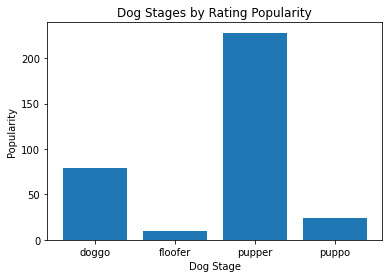

In [73]:
#visualize it
plt.bar(stage_popularity.index, stage_popularity)
plt.xlabel('Dog Stage')
plt.ylabel('Popularity')
plt.title('Dog Stages by Rating Popularity');

**Pupper is the most popular dog stage.**

### What dog stage has the highest number of likes from tweets?

In [74]:
#group master_df by dog_stage to find the stage whose tweets has the most likes
stage_likes = master_df.groupby('dog_stage')['favorite_count'].sum()
stage_likes

dog_stage
doggo      1245860.0
floofer      99122.0
pupper     1469562.0
puppo       489765.0
Name: favorite_count, dtype: float64

Plot a bar chart to visualize the insight and [format the y-axis to display its values in millions](https://stackoverflow.com/questions/61330427/set-y-axis-in-millions)

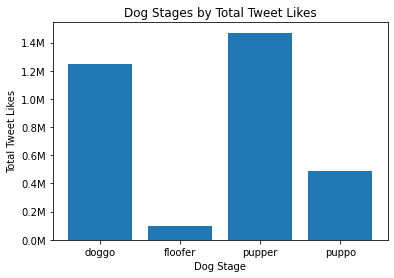

In [75]:
# import FuncFormatter from matplotlib.ticker. It is needed the define the million formatter
from matplotlib.ticker import FuncFormatter

# define the million formatter
def millions(x, pos):
    return '%1.1fM' % (x * 1e-6)


formatter = FuncFormatter(millions)

fig, ax = plt.subplots()
ax.bar(stage_likes.index, stage_likes)
ax.yaxis.set_major_formatter(formatter)
plt.xlabel('Dog Stage')
plt.ylabel('Total Tweet Likes')
plt.title('Dog Stages by Total Tweet Likes');

**Pupper has the highest total likes from tweets.**